datasets

Installing the packages

In [ ]:
pip install pandas geopandas requests matplotlib --quiet

Note: you may need to restart the kernel to use updated packages.


In [53]:
import json
import requests
import pandas as pd
import geopandas as gpd

In [54]:
import folium

In [55]:
with open('LCWIP_database.json','r') as f: #reading the lcwip database
  lcwip_data = json.load(f)
  lcwip_df = pd.DataFrame(lcwip_data)

Loading the dataset

In [56]:
df_org = lcwip_df #saving the untouched dataset

In [57]:
print(lcwip_df.columns.tolist()) #checking the columns

['pdf_url', 'date_published', 'mentions_pct', 'report_name', 'other_tools_used', 'how_pct_was_used', 'other_tools_developed', 'specific_evidence_of_impact_of_using_pct', 'quotes_on_using_pct', 'local_authority_name', 'combined_authority_name', 'length_of_cycle_network_proposed', 'total_cost_of_network', 'specific_evidence_of_impact']


In [58]:
lcwip_df.head() #the first 5 rows

,pdf_url,date_published,mentions_pct,report_name,other_tools_used,how_pct_was_used,other_tools_developed,specific_evidence_of_impact_of_using_pct,quotes_on_using_pct,local_authority_name,combined_authority_name,length_of_cycle_network_proposed,total_cost_of_network,specific_evidence_of_impact
0,https://api.liverpoolcityregion-ca.gov.uk/wp-c...,September 2023,True,Liverpool City Region Local Cycling and Walkin...,None,The PCT was used to identify existing patterns...,A specific 'Walking Audit Methodology for Live...,The PCT analysis was used to provide evidence ...,None,Liverpool City Region Combined Authority (LCRC...,Liverpool City Region Combined Authority,Up to 600km of cycling and walking routes are ...,The total cost for the 10-year proposals is ex...,NaN
1,https://edemocracy.northyorks.gov.uk/documents...,24 January 2025,True,Ripon and Catterick Phase 1 LCWIPs,None,The Propensity to Cycle Tool (PCT) was used to...,None,The PCT outputs provided evidence to support t...,None,North Yorkshire Council (for Ripon),York and North Yorkshire Combined Authority,A total network length is not specified. The p...,A total network cost is not provided. The plan...,NaN
2,https://edemocracy.northyorks.gov.uk/documents...,24 January 2025,True,Ripon and Catterick Phase 1 LCWIPs,None,The Propensity to Cycle Tool (PCT) was used to...,None,The PCT outputs provided evidence to support t...,None,North Yorkshire Council (for Catterick),York and North Yorkshire Combined Authority,A total network length is not specified. The p...,A total network cost is not provided. The plan...,NaN
3,https://www.cheshirewestandchester.gov.uk/asse...,2020,True,Cheshire West and Chester Council Local Cyclin...,None,The tool was used during the network planning ...,None,The analysis from the Propensity to Cycle Tool...,None,Cheshire West and Chester Council [3],None,Not specified in document,Not specified in document,NaN
4,https://www.rutland.gov.uk/sites/default/files...,August 2023,True,Rutland County Council Local Cycling and Walki...,None,The Propensity to Cycle Tool (PCT) was used to...,None,The PCT analysis identified a clear 'spoke' pa...,None,Rutland County Council,None,Not specified in document,"£35,582,560",NaN


In [59]:
lcwip_df.describe() #stats

,pdf_url,date_published,mentions_pct,report_name,other_tools_used,how_pct_was_used,other_tools_developed,specific_evidence_of_impact_of_using_pct,quotes_on_using_pct,local_authority_name,combined_authority_name,length_of_cycle_network_proposed,total_cost_of_network,specific_evidence_of_impact
count,99,99,99,99,73,97,33,43,74,99,24,99,99,53
unique,95,68,2,97,61,88,14,42,13,76,7,76,72,35
top,https://edemocracy.northyorks.gov.uk/documents...,2022-09-01,True,Ripon and Catterick Phase 1 LCWIPs,[Department for Transport (DfT) LCWIP Technica...,The Propensity to Cycle Tool (PCT) was used to...,[],The PCT identified areas of high existing and ...,[],Oxfordshire County Council,York and North Yorkshire Combined Authority,The plan details a network of primary and seco...,Not specified in the document.,The PCT analysis directly informed the identif...
freq,2,6,95,2,5,3,14,2,58,10,7,7,14,9


## mentions of PCT data pre-processing

In [60]:
lcwip_pct = df_org #df just for the mentions of PCT

In [61]:
lcwip_pct['mentions_pct'].value_counts() #checking the counts of reports that mention PCT

mentions_pct
True     95
False     4
Name: count, dtype: int64

In [62]:
lcwip_pct['mentions_pct'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%' #into percentage

mentions_pct
True     96.0%
False     4.0%
Name: proportion, dtype: object

In [63]:
lcwip_pct['report_name'].duplicated().value_counts() #checking the duplicates

report_name
False    97
True      2
Name: count, dtype: int64

In [64]:
lcwip_pct[lcwip_pct['report_name'].duplicated() == True]['report_name'] #each report represents the two LAs

2                    Ripon and Catterick Phase 1 LCWIPs
25    Thirsk and Whitby Local Cycling and Walking In...
Name: report_name, dtype: object

In [65]:
lcwip_pct[lcwip_pct['mentions_pct'] == False] #reports that do not mention the use of PCT

,pdf_url,date_published,mentions_pct,report_name,other_tools_used,how_pct_was_used,other_tools_developed,specific_evidence_of_impact_of_using_pct,quotes_on_using_pct,local_authority_name,combined_authority_name,length_of_cycle_network_proposed,total_cost_of_network,specific_evidence_of_impact
13,https://www.westofengland-ca.gov.uk/wp-content...,January 2021,False,West of England Local Cycling and Walking Infr...,None,None,None,None,None,"West of England Combined Authority (WECA), Bat...",West of England Combined Authority,Improvements along 55 continuous cycle routes [3],£411 million by 2036 (£306 million for cycling...,NaN
21,https://www.sstaffs.gov.uk/sites/default/files...,April 2021,False,Staffordshire County Council Newcastle-under-L...,None,None,None,None,None,Staffordshire County Council [3],None,144.111 km (combined total across six urban ar...,A minimum combined total cost of £31 million. [7],NaN
76,https://www.broads-authority.gov.uk/__data/ass...,2018-05-01,False,Broads Local Cycling and Walking Infrastructur...,[Department for Transport (DfT) guidance on cy...,The Propensity to Cycle Tool (PCT) is not ment...,None,Not applicable as the tool was not used.,[],Broads Authority,None,The plan details a primary and secondary netwo...,The document does not provide a single aggrega...,NaN
82,https://www.scilly.gov.uk/environment-transpor...,2023-12-14,False,Isles of Scilly Local Cycling & Walking Infras...,[Department for Transport (DfT) LCWIP Technica...,The Propensity to Cycle Tool (PCT) is not ment...,None,Not applicable as the tool was not mentioned.,[],Council of the ISLES OF SCILLY,None,"The plan details a range of priority schemes, ...",The document does not provide a single aggrega...,NaN


In [66]:
lcwip_pct[lcwip_pct['mentions_pct'] == False]['local_authority_name'] #the LA names

13    West of England Combined Authority (WECA), Bat...
21                     Staffordshire County Council [3]
76                                     Broads Authority
82                       Council of the ISLES OF SCILLY
Name: local_authority_name, dtype: object

## CA Analysis

In [67]:
lcwip_pct['combined_authority_name'].isna().sum() #checking how many reports corresponds to CAs


np.int64(75)

In [68]:
lcwip_pct['combined_authority_name'].notna() #checking the ones with CAs

0      True
1      True
2      True
3     False
4     False
      ...  
94    False
95    False
96    False
97    False
98    False
Name: combined_authority_name, Length: 99, dtype: bool

In [69]:
lcwip_df_final = lcwip_pct[lcwip_pct['combined_authority_name'].notna()] #making a df with the ones with CAs

In [70]:
print('LCWIP Database loaded successfully.')
print(f'Found {len(lcwip_df_final)} reports.') #checking the number of reports found in the database

LCWIP Database loaded successfully.
Found 24 reports.


In [71]:
# Display the first few rows of the df table to check
print("\nLCWIP DataFrame Head:")
print(lcwip_df_final.head())


LCWIP DataFrame Head:
                                              pdf_url    date_published  \
0   https://api.liverpoolcityregion-ca.gov.uk/wp-c...    September 2023   
1   https://edemocracy.northyorks.gov.uk/documents...   24 January 2025   
2   https://edemocracy.northyorks.gov.uk/documents...   24 January 2025   
6   https://democracy.york.gov.uk/documents/s18043...  December 4, 2024   
12  https://democracy.durham.gov.uk/documents/s145...      January 2021   

    mentions_pct                                        report_name  \
0           True  Liverpool City Region Local Cycling and Walkin...   
1           True                 Ripon and Catterick Phase 1 LCWIPs   
2           True                 Ripon and Catterick Phase 1 LCWIPs   
6           True  City of York Council Decision Report: Local Cy...   
12          True  Durham County Council LOCAL CYCLING AND WALKIN...   

   other_tools_used                                   how_pct_was_used  \
0              None  The 

In [72]:
#getting the GeoJSON data from the URL
CA_gjs_url = 'https://services1.arcgis.com/ESMARspQHYMw9BZ9/arcgis/rest/services/CAUTH_MAY_2025_EN_BSC/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson'

In [73]:
#request getting the CA URL
try:
    response = requests.get(CA_gjs_url)
    response.raise_for_status()  # Raise an exception for bad status codes
    ca_geojson = response.json()
    # Load into a GeoDataFrame for spatial analysis
    ca_gdf = gpd.GeoDataFrame.from_features(ca_geojson['features'], crs="EPSG:4326")
    print("Combined Authorities GeoJSON loaded successfully.")
    print(f"Found {len(ca_gdf)} Combined Authorities.")

except requests.exceptions.RequestException as e:
    print(f"Error fetching GeoJSON: {e}")
    ca_gdf = None

Combined Authorities GeoJSON loaded successfully.
Found 15 Combined Authorities.


In [74]:
if ca_gdf is not None: #checking the top 5 rows of the GeoJSON
    print("\nCombined Authorities GeoDataFrame Head:")
    print(ca_gdf.head())


Combined Authorities GeoDataFrame Head:
                                            geometry  FID  CAUTH25CD  \
0  POLYGON ((-2.13413 53.68573, -2.12539 53.67484...    1  E47000001   
1  POLYGON ((-0.99046 53.66122, -0.99023 53.65898...    2  E47000002   
2  POLYGON ((-1.87872 53.96239, -1.87885 53.95425...    3  E47000003   
3  MULTIPOLYGON (((-2.62684 53.35464, -2.63147 53...    4  E47000004   
4  MULTIPOLYGON (((-1.24194 54.72272, -1.24252 54...    5  E47000006   

               CAUTH25NM   BNG_E   BNG_N      LONG        LAT   Shape__Area  \
0     Greater Manchester  377929  401095 -2.334239  53.506093  1.275867e+09   
1        South Yorkshire  441052  398663 -1.382848  53.483111  1.552193e+09   
2         West Yorkshire  418683  427238 -1.718223  53.741208  2.030623e+09   
3  Liverpool City Region  344345  390165 -2.838616  53.405369  7.263838e+08   
4            Tees Valley  436953  521739 -1.429689  54.589511  7.955595e+08   

   Shape__Length                              Globa

In [75]:
#cleaning the authority name from the LCWIP database to match the CA GJson
lcwip_df_final['clean_authority_name'] = lcwip_df_final['combined_authority_name'].str.split(' \[').str[0]

#name of the authority is in the 'CAUTH25NM' column of the GeoDataFrame
if ca_gdf is not None:
    ca_names = ca_gdf['CAUTH25NM'].unique().tolist()
ca_names

<>:2: SyntaxWarning: invalid escape sequence '\['
<>:2: SyntaxWarning: invalid escape sequence '\['
C:\Users\May Mon Thet Khine\AppData\Local\Temp\ipykernel_4216\102710397.py:2: SyntaxWarning: invalid escape sequence '\['
  lcwip_df_final['clean_authority_name'] = lcwip_df_final['combined_authority_name'].str.split(' \[').str[0]
C:\Users\May Mon Thet Khine\AppData\Local\Temp\ipykernel_4216\102710397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lcwip_df_final['clean_authority_name'] = lcwip_df_final['combined_authority_name'].str.split(' \[').str[0]


['Greater Manchester',
 'South Yorkshire',
 'West Yorkshire',
 'Liverpool City Region',
 'Tees Valley',
 'West Midlands',
 'Cambridgeshire and Peterborough',
 'West of England',
 'York and North Yorkshire',
 'East Midlands',
 'North East',
 'Devon and Torbay',
 'Hull and East Yorkshire',
 'Greater Lincolnshire',
 'Lancashire']

<Axes: >

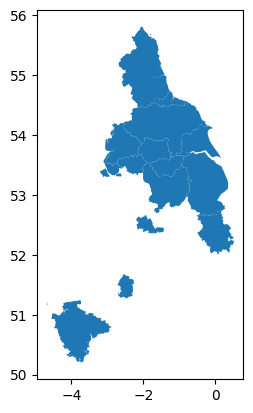

In [76]:
ca_gdf.plot()

In [77]:
lcwip_df_final['clean_authority_name'].unique() #from the LCWIPs final df, checking the unique CA names

array(['Liverpool City Region Combined Authority',
       'York and North Yorkshire Combined Authority',
       'North East Combined Authority',
       'West of England Combined Authority',
       'Cambridgeshire and Peterborough Combined Authority',
       'East Midlands Combined County Authority',
       'West Yorkshire Combined Authority'], dtype=object)

In [78]:
def find_ca(report_authority_name, ca_list):
    """Checks if any Combined Authority name is in the report's authority string."""
    for ca_name in ca_list:
        if ca_name in report_authority_name:
            return ca_name
    return None # Return None if no match is found

if ca_gdf is not None:
    # Create a new column in the LCWIP DataFrame to store the matched Combined Authority
    lcwip_df_final['matched_authority'] = lcwip_df_final['clean_authority_name'].apply(lambda x: find_ca(x, ca_names))

    # See how many reports were matched
    matched_reports = lcwip_df_final[lcwip_df_final['matched_authority'].notna()]
    print(f"\nSuccessfully matched {len(matched_reports)} reports to a Combined Authority.")
    print(matched_reports[['clean_authority_name', 'matched_authority']].head())


Successfully matched 24 reports to a Combined Authority.
                           clean_authority_name         matched_authority
0      Liverpool City Region Combined Authority     Liverpool City Region
1   York and North Yorkshire Combined Authority  York and North Yorkshire
2   York and North Yorkshire Combined Authority  York and North Yorkshire
6   York and North Yorkshire Combined Authority  York and North Yorkshire
12                North East Combined Authority                North East


C:\Users\May Mon Thet Khine\AppData\Local\Temp\ipykernel_4216\4083163492.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lcwip_df_final['matched_authority'] = lcwip_df_final['clean_authority_name'].apply(lambda x: find_ca(x, ca_names))


In [79]:
lcwip_df_final[['matched_authority','clean_authority_name']]

,matched_authority,clean_authority_name
0,Liverpool City Region,Liverpool City Region Combined Authority
1,York and North Yorkshire,York and North Yorkshire Combined Authority
2,York and North Yorkshire,York and North Yorkshire Combined Authority
6,York and North Yorkshire,York and North Yorkshire Combined Authority
12,North East,North East Combined Authority
13,West of England,West of England Combined Authority
15,North East,North East Combined Authority
17,Cambridgeshire and Peterborough,Cambridgeshire and Peterborough Combined Autho...
22,East Midlands,East Midlands Combined County Authority
24,York and North Yorkshire,York and North Yorkshire Combined Authority


##Coverage Analysis

In [80]:
# Grouping by the 'clean_authority_name' column and count the number of reports
if ca_gdf is not None:
    ca_coverage = lcwip_df_final.groupby('matched_authority').size().reset_index(name='report_count')
    ca_coverage = ca_coverage.sort_values('report_count', ascending=False)
    print("\nLCWIP Report Count per Combined Authority")
    print(ca_coverage)


LCWIP Report Count per Combined Authority
                 matched_authority  report_count
6         York and North Yorkshire             7
3                       North East             5
4                   West Yorkshire             5
0  Cambridgeshire and Peterborough             3
2            Liverpool City Region             2
1                    East Midlands             1
5                  West of England             1


In [81]:
#Merge analysis results back into the GeoDataFrame for mapping
if ca_gdf is not None:
    # Merge the coverage count into the GeoDataFrame
    # We use a 'left' merge to keep all Combined Authorities, even those with no reports
    map_gdf = ca_gdf.merge(ca_coverage, left_on='CAUTH25NM', right_on='matched_authority', how='left')
    # Fill in 0 for CAs with no matched reports and ensure the count is an integer
    #map_gdf['report_count'] = ca_coverage['report_count'].fillna(0).astype(int)

    print("\nData prepared for mapping:")
    print(map_gdf[['CAUTH25NM', 'report_count']].head(10))


Data prepared for mapping:
                         CAUTH25NM  report_count
0               Greater Manchester           NaN
1                  South Yorkshire           NaN
2                   West Yorkshire           5.0
3            Liverpool City Region           2.0
4                      Tees Valley           NaN
5                    West Midlands           NaN
6  Cambridgeshire and Peterborough           3.0
7                  West of England           1.0
8         York and North Yorkshire           7.0
9                    East Midlands           1.0


In [82]:
map_gdf.columns.to_list()

['geometry',
 'FID',
 'CAUTH25CD',
 'CAUTH25NM',
 'BNG_E',
 'BNG_N',
 'LONG',
 'LAT',
 'Shape__Area',
 'Shape__Length',
 'GlobalID',
 'matched_authority',
 'report_count']

In [83]:
map_gdf['report_count'] = map_gdf['report_count'].fillna(0).astype(int)

In [84]:
#Creating a Folium map centered on England
m = folium.Map(location=[52.9, -1.5], zoom_start=6)

#defining a threshold scale
threshold_scale = [0, 1, 2, 3, 4, 5, 6, 7, 8]

#a Choropleth layer to color the regions by report count
folium.Choropleth(
    geo_data=map_gdf,
    name='LCWIP Report Count',
    data=map_gdf,
    columns=['CAUTH25NM', 'report_count'],
    key_on='feature.properties.CAUTH25NM',
    fill_color='YlGnBu', # Color scheme
    fill_opacity=0.9,
    line_opacity=0.2,
    legend_name='Number of LCWIP Reports in Database',
    threshold_scale=threshold_scale,
    nan_fill_color='black'
).add_to(m)

#fields to include in the popup
popup_fields = ['CAUTH25NM', 'report_count']
aliases = ['Combined Authority:', 'LCWIP Reports:']

#Adding a GeoJson layer with interactive popups
folium.GeoJson(
    map_gdf,
    name="Combined Authorities",
    style_function=lambda x: {'color': 'black', 'weight': 0.5, 'fillOpacity': 0.1},
    tooltip=folium.features.GeoJsonTooltip(fields=['CAUTH25NM']),
    popup=folium.features.GeoJsonPopup(fields=popup_fields, aliases=aliases)
).add_to(m)

#Adding a layer control to toggle layers on and off
folium.LayerControl().add_to(m)

# Save the map to an HTML file
#m.save('interactive_map.html')

#print("\nSuccess! Interactive map has been saved as 'interactive_map.html'")
#print("Open this file in your web browser to see the results.")

#Display the Map in the Notebook
m


In [85]:
lcwip_df_final[lcwip_df_final['mentions_pct']==True]['matched_authority'].count()

np.int64(23)

In [86]:
lcwip_df_final[lcwip_df_final['mentions_pct']==False]['pdf_url']

13    https://www.westofengland-ca.gov.uk/wp-content...
Name: pdf_url, dtype: object

In [87]:
lcwip_df_final.columns

Index(['pdf_url', 'date_published', 'mentions_pct', 'report_name',
       'other_tools_used', 'how_pct_was_used', 'other_tools_developed',
       'specific_evidence_of_impact_of_using_pct', 'quotes_on_using_pct',
       'local_authority_name', 'combined_authority_name',
       'length_of_cycle_network_proposed', 'total_cost_of_network',
       'specific_evidence_of_impact', 'clean_authority_name',
       'matched_authority'],
      dtype='object')

In [88]:
lcwip_df_final.columns

Index(['pdf_url', 'date_published', 'mentions_pct', 'report_name',
       'other_tools_used', 'how_pct_was_used', 'other_tools_developed',
       'specific_evidence_of_impact_of_using_pct', 'quotes_on_using_pct',
       'local_authority_name', 'combined_authority_name',
       'length_of_cycle_network_proposed', 'total_cost_of_network',
       'specific_evidence_of_impact', 'clean_authority_name',
       'matched_authority'],
      dtype='object')

In [89]:
lcwip_df_final['length_of_cycle_network_proposed'].isna().value_counts()

length_of_cycle_network_proposed
False    24
Name: count, dtype: int64

In [90]:
lcwip_df_final['length_of_cycle_network_proposed']

0     Up to 600km of cycling and walking routes are ...
1     A total network length is not specified. The p...
2     A total network length is not specified. The p...
6                             Not specified in document
12                        Not specified in document [5]
13    Improvements along 55 continuous cycle routes [3]
15                        Not specified in document [3]
17    The document identifies 16 specific cycling ro...
22    1012 links were identified for the D2N2 sub-re...
24                            Not specified in document
25                            Not specified in document
44    The plan details a network of primary and seco...
46    Over 800km of new and improved cycle infrastru...
47    The plan details a network of 14 primary route...
48    The plan proposes a comprehensive network of p...
49    The plan details a network of 12 primary route...
50    The plan details a network of 12 primary route...
52    The plan details a network of 12 primary r

Total Investment per CA

In [91]:
import re
import numpy as np

In [92]:
def parse_cost_gbp(cost_value):
    if cost_value is None or pd.isna(cost_value):
        return np.nan

    if isinstance(cost_value, dict):
        cost_str = cost_value.get('min', '0')
    else:
        cost_str = str(cost_value)

    cost_str = cost_str.lower().replace('£', '').replace(',', '').replace('approximately', '').strip()

    if 'million' in cost_str:
        num_part = re.findall(r'[\d\.]+', cost_str)
        if num_part:
            # FIX: Check if the found part is just a period.
            if num_part[0] == '.': return np.nan
            return float(num_part[0]) * 1_000_000

    num_part = re.findall(r'[\d\.]+', cost_str)
    if num_part:
        # FIX: Check if the found part is just a period.
        if num_part[0] == '.': return np.nan
        return float(num_part[0])

    return np.nan



In [103]:
def parse_length_km(length_value):
    if length_value is None or pd.isna(length_value):
        return np.nan

    length_str = str(length_value).lower().replace('km', '').replace('circa', '').replace('links', '').replace('routes', '').strip()

    numbers = re.findall(r'[\d\.]+', length_str)
    if numbers:
        # FIX: Check if the found part is just a period.
        if numbers[0] == '.': return np.nan
        return float(numbers[0])

    return np.nan


In [104]:
#Applying these robust functions to your DataFrame
lcwip_df_final['cost_gbp'] = lcwip_df_final['total_cost_of_network'].apply(parse_cost_gbp)

lcwip_df_final['length_km'] = lcwip_df_final['length_of_cycle_network_proposed'].apply(parse_length_km)
lcwip_df_final['length_km'] = lcwip_df_final['length_km'].fillna(
    lcwip_df_final['length_of_cycle_network_proposed'].apply(parse_length_km)
)

print("Numeric 'cost_gbp' and 'length_km' columns have been created with the corrected functions.")
print(lcwip_df_final[['report_name', 'cost_gbp', 'length_km']].head())

Numeric 'cost_gbp' and 'length_km' columns have been created with the corrected functions.
                                          report_name    cost_gbp  length_km
0   Liverpool City Region Local Cycling and Walkin...  10000000.0      600.0
1                  Ripon and Catterick Phase 1 LCWIPs         NaN        NaN
2                  Ripon and Catterick Phase 1 LCWIPs         NaN        NaN
6   City of York Council Decision Report: Local Cy...         NaN        NaN
12  Durham County Council LOCAL CYCLING AND WALKIN...         NaN        5.0


C:\Users\May Mon Thet Khine\AppData\Local\Temp\ipykernel_4216\3948909156.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lcwip_df_final['cost_gbp'] = lcwip_df_final['total_cost_of_network'].apply(parse_cost_gbp)
C:\Users\May Mon Thet Khine\AppData\Local\Temp\ipykernel_4216\3948909156.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lcwip_df_final['length_km'] = lcwip_df_final['length_of_cycle_network_proposed'].apply(parse_length_km)
C:\Users\May Mon Thet Khine\AppData\Local\Temp\ipykernel_4216\39489

In [105]:
# Group by the 'combined_authority_name' and aggregate the metrics
ca_analysis = lcwip_df_final.groupby('combined_authority_name').agg(
    report_count=('report_name', 'size'),
    pct_mentions=('mentions_pct', 'sum'),
    total_funding_gbp=('cost_gbp', 'sum'),
    total_length_km=('length_km', 'sum')
).sort_values('report_count', ascending=False)

# Calculate the percentage of reports that use PCT for each CA
ca_analysis['pct_usage_percentage'] = (ca_analysis['pct_mentions'] / ca_analysis['report_count'] * 100).round(1)

print("Analysis per Combined Authority is complete.")
ca_analysis

Analysis per Combined Authority is complete.


,report_count,pct_mentions,total_funding_gbp,total_length_km,pct_usage_percentage
combined_authority_name,,,,,
York and North Yorkshire Combined Authority,7,7,110900000.0,0.0,100.0
North East Combined Authority,5,5,115000000.0,117.0,100.0
West Yorkshire Combined Authority,5,5,0.0,850.0,100.0
Cambridgeshire and Peterborough Combined Authority,3,3,130746000.0,560.0,100.0
Liverpool City Region Combined Authority,2,2,10000000.0,613.0,100.0
East Midlands Combined County Authority,1,1,661995000.0,1012.0,100.0
West of England Combined Authority,1,0,411000000.0,55.0,0.0


In [96]:
cols = ['total_cost_of_network','cost_gbp','combined_authority_name']

In [97]:
ca_name_cleaned = lcwip_df_final['combined_authority_name'].unique().tolist()

In [98]:
for ca_name in ca_name_cleaned:
    print(lcwip_df_final[lcwip_df_final['combined_authority_name']==ca_name][cols])

                                total_cost_of_network    cost_gbp  \
0   The total cost for the 10-year proposals is ex...  10000000.0   
73  The document does not provide a single aggrega...         NaN   

                     combined_authority_name  
0   Liverpool City Region Combined Authority  
73  Liverpool City Region Combined Authority  
                                total_cost_of_network     cost_gbp  \
1   A total network cost is not provided. The plan...          NaN   
2   A total network cost is not provided. The plan...          NaN   
6   Not specified in document. The report states '...          NaN   
24  Not specified in document, but provides indica...          NaN   
25  Not specified in document, but provides indica...          NaN   
48         Approximately £100 million to £150 million  100000000.0   
71                        Approximately £10.9 million   10900000.0   

                        combined_authority_name  
1   York and North Yorkshire Combined Au

In [99]:
lcwip_df_final[lcwip_df_final['combined_authority_name']=='West of England Combined Authority'].iloc[:87]

,pdf_url,date_published,mentions_pct,report_name,other_tools_used,how_pct_was_used,other_tools_developed,specific_evidence_of_impact_of_using_pct,quotes_on_using_pct,local_authority_name,combined_authority_name,length_of_cycle_network_proposed,total_cost_of_network,specific_evidence_of_impact,clean_authority_name,matched_authority,cost_gbp,length_km
13,https://www.westofengland-ca.gov.uk/wp-content...,January 2021,False,West of England Local Cycling and Walking Infr...,None,None,None,None,None,"West of England Combined Authority (WECA), Bat...",West of England Combined Authority,Improvements along 55 continuous cycle routes [3],£411 million by 2036 (£306 million for cycling...,NaN,West of England Combined Authority,West of England,411000000.0,55.0


In [100]:
lcwip_df_final[lcwip_df_final['combined_authority_name']=='Cambridgeshire and Peterborough Combined Authority']

,pdf_url,date_published,mentions_pct,report_name,other_tools_used,how_pct_was_used,other_tools_developed,specific_evidence_of_impact_of_using_pct,quotes_on_using_pct,local_authority_name,combined_authority_name,length_of_cycle_network_proposed,total_cost_of_network,specific_evidence_of_impact,clean_authority_name,matched_authority,cost_gbp,length_km
17,https://www.peterborough.gov.uk/asset-library/...,2024,True,Peterborough City Council Local Cycling and Wa...,None,The Propensity to Cycle Tool (PCT) was used to...,None,The PCT's 'Go Dutch' scenario analysis was use...,None,Peterborough City Council (PCC),Cambridgeshire and Peterborough Combined Autho...,The document identifies 16 specific cycling ro...,The total Present Value of Costs (PVC) for all...,NaN,Cambridgeshire and Peterborough Combined Autho...,Cambridgeshire and Peterborough,18746000.0,16.0
70,https://democracy.peterborough.gov.uk/document...,2024-07-16,True,Peterborough Local Cycling and Walking Infrast...,[Department for Transport (DfT) LCWIP Technica...,The Propensity to Cycle Tool (PCT) was used to...,A bespoke Prioritisation Framework was develop...,NaN,[The Propensity to Cycle Tool (PCT) was used t...,Peterborough City Council,Cambridgeshire and Peterborough Combined Autho...,The plan details a network of 10 primary and 1...,Approximately £112 million,The PCT analysis directly informed the identif...,Cambridgeshire and Peterborough Combined Autho...,Cambridgeshire and Peterborough,112000000.0,10.0
87,https://www.cambridgeshire.gov.uk/residents/tr...,July 2022,True,Cambridgeshire's Local Cycling and Walking Inf...,[Sustrans Bike Life 2019 report (for Greater C...,The Propensity to Cycle Tool (PCT) was used to...,[Cambridgeshire County Council's Non-motorised...,The use of the PCT directly informed the prior...,[],Cambridgeshire County Council,Cambridgeshire and Peterborough Combined Autho...,The document states that the resulting potenti...,The document states that the 'value figure' (c...,NaN,Cambridgeshire and Peterborough Combined Autho...,Cambridgeshire and Peterborough,NaN,534.0


In [101]:
lcwip_df_final[lcwip_df_final['combined_authority_name']=='Cambridgeshire and Peterborough Combined Authority']['local_authority_name']

17    Peterborough City Council (PCC)
70          Peterborough City Council
87      Cambridgeshire County Council
Name: local_authority_name, dtype: object

In [102]:
# Calculate the overall PCT usage percentage across all reports in CAs
total_reports_in_cas = ca_analysis['report_count'].sum()
total_pct_mentions_in_cas = ca_analysis['pct_mentions'].sum()
overall_pct_percentage = (total_pct_mentions_in_cas / total_reports_in_cas * 100).round(1)

print(f"Overall PCT Usage Analysis (for reports within Combined Authorities):")
print(f"Total Reports: {total_reports_in_cas}")
print(f"Reports Mentioning PCT: {total_pct_mentions_in_cas}")
print(f"Percentage of Reports Using PCT: {overall_pct_percentage}%")

# Display the formatted final analysis table
print("\n--- Detailed Analysis per Combined Authority ---")

# Format the columns for better presentation
ca_analysis['total_funding_gbp'] = ca_analysis['total_funding_gbp'].apply(lambda x: f"£{x:,.0f}" if x > 0 else 'Not Specified')
ca_analysis['total_length_km'] = ca_analysis['total_length_km'].apply(lambda x: f"{x:,.1f} km" if x > 0 else 'Not Specified')
ca_analysis['pct_usage_percentage'] = ca_analysis['pct_usage_percentage'].astype(str) + '%'

# Rename columns for the final report
ca_analysis.rename(columns={
    'report_count': 'Report Count',
    'pct_mentions': 'PCT Mentions',
    'total_funding_gbp': 'Total Funding (GBP)',
    'total_length_km': 'Total Network Length (km)',
    'pct_usage_percentage': '% of Reports Using PCT'
}, inplace=True)

ca_analysis

Overall PCT Usage Analysis (for reports within Combined Authorities):
Total Reports: 24
Reports Mentioning PCT: 23
Percentage of Reports Using PCT: 95.8%

--- Detailed Analysis per Combined Authority ---


,Report Count,PCT Mentions,Total Funding (GBP),Total Network Length (km),% of Reports Using PCT
combined_authority_name,,,,,
York and North Yorkshire Combined Authority,7,7,"£110,900,000",Not Specified,100.0%
North East Combined Authority,5,5,"£115,000,000",117.0 km,100.0%
West Yorkshire Combined Authority,5,5,Not Specified,850.0 km,100.0%
Cambridgeshire and Peterborough Combined Authority,3,3,"£130,746,000",560.0 km,100.0%
Liverpool City Region Combined Authority,2,2,"£10,000,000",613.0 km,100.0%
East Midlands Combined County Authority,1,1,"£661,995,000","1,012.0 km",100.0%
West of England Combined Authority,1,0,"£411,000,000",55.0 km,0.0%


UK Transport Authorities - ATF

In [112]:
atf_auth = gpd.read_file('https://raw.githubusercontent.com/itsleeds/uktransportauthorities/main/atf_joined_2025.geojson')

<Axes: >

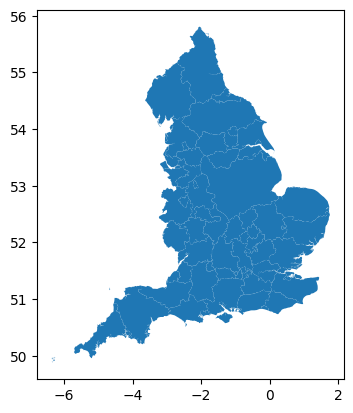

In [109]:
atf_auth.plot()

In [110]:
atf_auth

,name,atf24_25,atf23_24,atf22_23,atf21_22,atf20_21,atfe20_21,geometry
0,Bedford,110977.0,0.0,263130.0,0.0,363750.0,30250.0,"MULTIPOLYGON (((-0.47626 52.31806, -0.48714 52..."
1,Blackburn with Darwen,185106.0,0.0,157270.0,0.0,292600.0,77000.0,"MULTIPOLYGON (((-2.46581 53.78081, -2.47709 53..."
2,Blackpool,84208.0,0.0,0.0,0.0,312000.0,26000.0,"MULTIPOLYGON (((-3.01524 53.84277, -3.01794 53..."
3,"Bournemouth, Christchurch and Poole",478063.0,0.0,3780000.0,208947.0,1062100.0,312835.0,"MULTIPOLYGON (((-1.85662 50.80489, -1.8646 50...."
4,Bracknell Forest,74781.0,75000.0,30000.0,0.0,181800.0,57000.0,"MULTIPOLYGON (((-0.76964 51.46776, -0.78256 51..."
...,...,...,...,...,...,...,...,...
68,Wiltshire,306720.0,100000.0,978000.0,0.0,681000.0,227000.0,"MULTIPOLYGON (((-1.79168 51.66313, -1.78862 51..."
69,Windsor and Maidenhead,91955.0,0.0,262100.0,0.0,335400.0,140000.0,"MULTIPOLYGON (((-0.71691 51.57719, -0.72786 51..."
70,Wokingham,212882.0,0.0,606215.0,2950000.0,576650.0,76000.0,"MULTIPOLYGON (((-0.82406 51.51248, -0.83619 51..."
71,Worcestershire,361405.0,748899.0,0.0,0.0,649200.0,135500.0,"MULTIPOLYGON (((-2.42634 52.36583, -2.45765 52..."
